## packages and dataset load

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = catalog.load('titanic_train_dataset')

[02/24/23 23:06:04] INFO     Loading data from 'titanic_train_dataset' (CSVDataSet)...          data_catalog.py:343

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Drop atributes

In [7]:
# PassengerId: Id from each passenger
# Name: Name from each passenger
# Ticket: Pass id
# Cabin: Cabine passager

In [8]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1,inplace=True)

## Age

In [9]:
mean_age = round(df['Age'].mean())
mean_age

30

In [10]:
df.loc[(df.Age.isnull()),'Age'] = mean_age

In [11]:
# The following are the American Medical Associations’ age designations:
# Neonates or newborns (birth to 1 month)
# Infants (1 month to 1 year)
# Children (1 year through 12 years)
# Adolescents (13 years through 17 years. They may also be referred to as teenagers depending on the context.)
# Adults (18 years or older)
# Older adults (65 and older)*

# My definition:
#0 (Children) Age < 12
#1 (Adolescents) 12 <= Age < 18
#2 (Adults 1) 18 <= Age < 34
#3 (Adults 2) 34 <= Age < 50
#4 (Adults 3) 50 <= Age < 65
#5 (Seniors) 65 <= Age

In [12]:
df['age_category'] = 0
df.loc[(df['Age'] < 12),'age_category'] = 0
df.loc[(df['Age'] >= 12)&(df['Age'] < 18),'age_category'] = 1
df.loc[(df['Age'] >= 18)&(df['Age'] < 34),'age_category'] = 2
df.loc[(df['Age'] >= 34)&(df['Age'] < 50),'age_category'] = 3
df.loc[(df['Age'] >= 50)&(df['Age'] < 65),'age_category'] = 4
df.loc[(df['Age'] >= 65),'age_category'] = 5

## Fare

In [13]:
#0 Fare < 8
#1 8 <= Fare < 13
#2 13 <= Fare < 21
#3 21 <= Fare < 27
#4 27 <= Fare < 32
#5 32 <= Fare < 84
#6 84 <= Fare

In [14]:
df['fare_category'] = 0
df.loc[(df['Fare'] < 8),'fare_category'] = 0
df.loc[(df['Fare'] >= 8)&(df['Fare'] < 13),'fare_category'] = 1
df.loc[(df['Fare'] >= 13)&(df['Fare'] < 21),'fare_category'] = 2
df.loc[(df['Fare'] >= 21)&(df['Fare'] < 27),'fare_category'] = 3
df.loc[(df['Fare'] >= 27)&(df['Fare'] < 32),'fare_category'] = 4
df.loc[(df['Fare'] >= 32)&(df['Fare'] < 84),'fare_category'] = 5
df.loc[(df['Fare'] >= 84),'fare_category'] = 6

## Embarked

In [15]:
df['Embarked'].mode()[0]

'S'

In [16]:
df['Embarked'].fillna('S',inplace=True)

## Encoder

In [17]:
df.drop(['Age', 'Fare'],axis=1,inplace=True)

In [18]:
df.isnull().sum()

Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Embarked         0
age_category     0
fare_category    0
dtype: int64

In [19]:
df.dtypes

Survived          int64
Pclass            int64
Sex              object
SibSp             int64
Parch             int64
Embarked         object
age_category      int64
fare_category     int64
dtype: object

In [20]:
# male: 0
# female: 1
print(df['Sex'].unique())
df['Sex'].replace(['male','female'],[0,1],inplace=True)
print(df['Sex'].unique())

['male' 'female']
[0 1]


In [21]:
# S: 0
# C: 1
# Q: 2
print(df['Embarked'].unique())
df['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2],inplace=True)
print(df['Embarked'].unique())

['S' 'C' 'Q']
[0 1 2]


In [22]:
df.dtypes

Survived         int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Embarked         int64
age_category     int64
fare_category    int64
dtype: object

# Modeling

In [23]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## LogisticRegression

In [25]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
print(classification_report(y_test, y_pred_lr, output_dict=False))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       137
           1       0.72      0.73      0.73        86

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



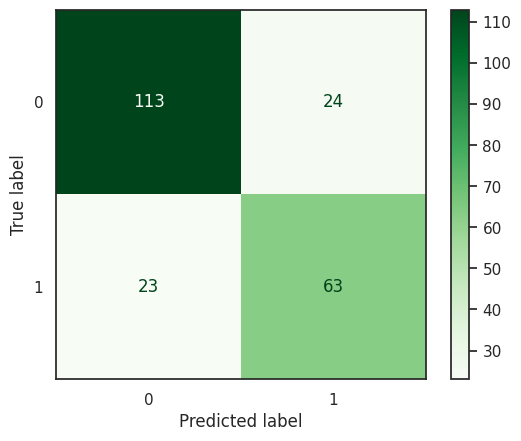

In [26]:
sns.set_theme(style="white", palette=None)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, labels=model_lr.classes_, cmap='Greens')
plt.show()

## RandomForestClassifier

In [27]:
model_rf = RandomForestClassifier(max_depth=2, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print(classification_report(y_test, y_pred_rf, output_dict=False))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       137
           1       0.82      0.58      0.68        86

    accuracy                           0.79       223
   macro avg       0.80      0.75      0.76       223
weighted avg       0.79      0.79      0.78       223



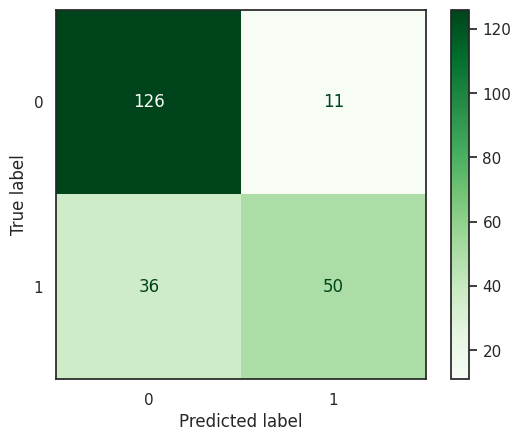

In [28]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, labels=model_rf.classes_, cmap='Greens')
plt.show()

## svm

In [29]:
model_svm = svm.SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
print(classification_report(y_test, y_pred_svm, output_dict=False))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       137
           1       0.79      0.72      0.76        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



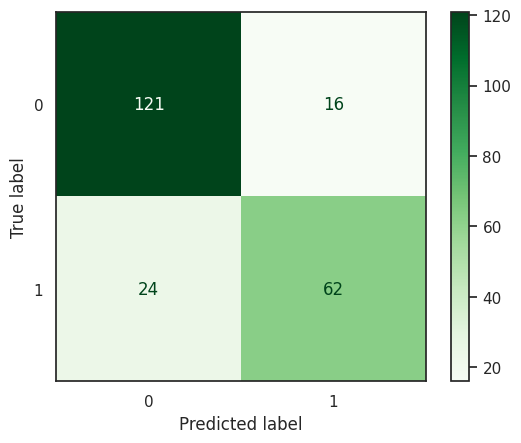

In [30]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, labels=model_svm.classes_, cmap='Greens')
plt.show()

## GaussianNB

In [31]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
print(classification_report(y_test, y_pred_nb, output_dict=False))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       137
           1       0.64      0.78      0.71        86

    accuracy                           0.75       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.76      0.75      0.75       223



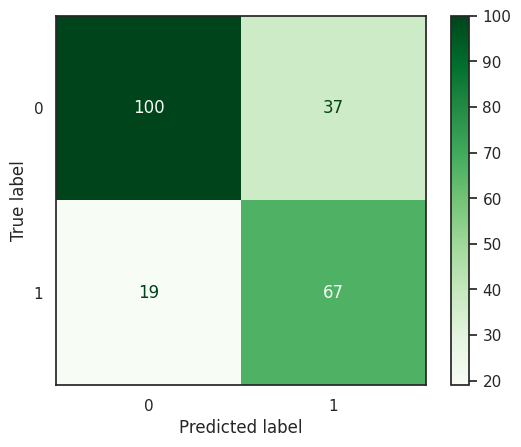

In [32]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, labels=model_nb.classes_, cmap='Greens')
plt.show()

## KNeighborsClassifier

In [33]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
print(classification_report(y_test, y_pred_knn, output_dict=False))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       137
           1       0.70      0.59      0.64        86

    accuracy                           0.74       223
   macro avg       0.73      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223



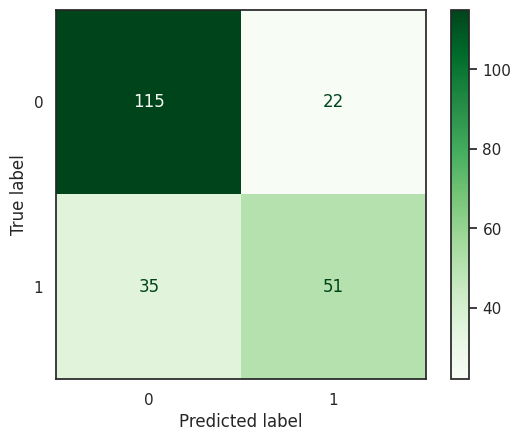

In [34]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, labels=model_knn.classes_, cmap='Greens')
plt.show()

## DecisionTreeClassifier

In [35]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
print(classification_report(y_test, y_pred_dt, output_dict=False))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       137
           1       0.71      0.60      0.65        86

    accuracy                           0.75       223
   macro avg       0.74      0.73      0.73       223
weighted avg       0.75      0.75      0.75       223



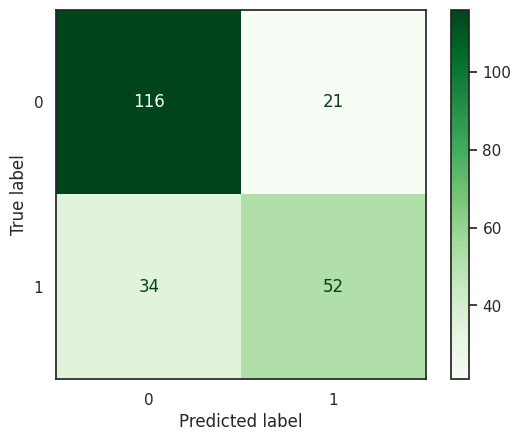

In [36]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, labels=model_dt.classes_, cmap='Greens')
plt.show()